## EDA of the clean PERSIANN

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import georasters as grs

from PIL import Image
import matplotlib.pyplot as plt

import datetime
import time

from persiann_api.main import download_data

# Downloading data

In [2]:
t0 = time.time()
# downloads daily data and store each data from date inside the folder.
download_data(
    from_date=datetime.date(2021, 12, 28),
    to_date=datetime.date(2021, 12, 28),
    folder='../data/test_data',
    # bounding box for Brazil
    lat_bb=(-35, 6),
    lon_bb=(-74, -34)
)
print(time.time() - t0)

Data downloaded!
5.057269811630249


# Image visualization

(165, 161)


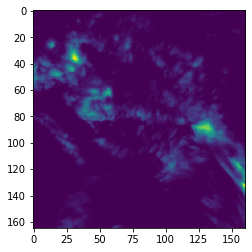

In [13]:
# read the GeoTIFF with your favorite package
geotiff_path = '../data/test_data/2021_12_28.tiff'
arr = np.asarray(Image.open(geotiff_path, mode='r'))[::-1]
print(arr.shape)

plt.imshow(arr)
plt.clim(0, 78)
plt.savefig('../github_images/PERSIANN_API_example.png')

# Geographical visualization with GADM data

Download the shapefile of Brazil's country at https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip. This is part of the GADM data.

<AxesSubplot:>

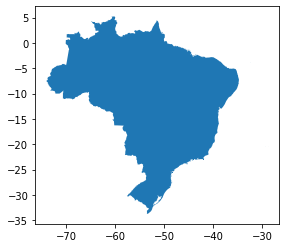

In [4]:
gadm = gpd.read_file(
    '../data/gadm/gadm36_BRA_0.shp'
)
gadm.plot()

In [5]:
geodata = grs.from_file("../data/test_data/2021_12_28.tiff").to_geopandas()
geodata.head(5)

,row,col,value,x,y,geometry
0,0,16,2.00,-70.00,-35.0,"POLYGON ((-70.00000 -35.00000, -69.75000 -35.0..."
1,0,17,2.96,-69.75,-35.0,"POLYGON ((-69.75000 -35.00000, -69.50000 -35.0..."
2,0,18,4.97,-69.50,-35.0,"POLYGON ((-69.50000 -35.00000, -69.25000 -35.0..."
3,0,19,5.72,-69.25,-35.0,"POLYGON ((-69.25000 -35.00000, -69.00000 -35.0..."
4,0,20,7.06,-69.00,-35.0,"POLYGON ((-69.00000 -35.00000, -68.75000 -35.0..."


In [6]:
geodata

,row,col,value,x,y,geometry
0,0,16,2.00,-70.00,-35.0,"POLYGON ((-70.00000 -35.00000, -69.75000 -35.0..."
1,0,17,2.96,-69.75,-35.0,"POLYGON ((-69.75000 -35.00000, -69.50000 -35.0..."
2,0,18,4.97,-69.50,-35.0,"POLYGON ((-69.50000 -35.00000, -69.25000 -35.0..."
3,0,19,5.72,-69.25,-35.0,"POLYGON ((-69.25000 -35.00000, -69.00000 -35.0..."
4,0,20,7.06,-69.00,-35.0,"POLYGON ((-69.00000 -35.00000, -68.75000 -35.0..."
...,...,...,...,...,...,...
12592,164,135,1.06,-40.25,6.0,"POLYGON ((-40.25000 6.00000, -40.00000 6.00000..."
12593,164,136,0.27,-40.00,6.0,"POLYGON ((-40.00000 6.00000, -39.75000 6.00000..."
12594,164,137,0.81,-39.75,6.0,"POLYGON ((-39.75000 6.00000, -39.50000 6.00000..."
12595,164,138,1.36,-39.50,6.0,"POLYGON ((-39.50000 6.00000, -39.25000 6.00000..."


In [7]:
geodata.agg(['min', 'max', 'mean', 'median']).round()

,row,col,value,x,y
min,0.0,0.0,0.0,-74.0,-35.0
max,164.0,160.0,78.0,-34.0,6.0
mean,87.0,82.0,7.0,-54.0,-13.0
median,89.0,84.0,4.0,-53.0,-13.0


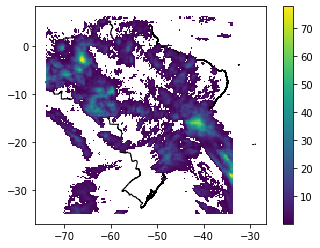

In [12]:
ax = gadm.plot(color='white', edgecolor='black')

ax = geodata.query(
    'value > 0'
).plot(ax=ax, column='value', legend=True, markersize=1)

plt.savefig('../github_images/PERSIANN_API_example_geopandas_georasters.png')